## Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
import tensorflow as tf


# Step 1: Data Preprocessing
# Importing and displaying the dataset

In [ ]:
data = pd.read_csv("bank-full.csv", sep=';')   #45211 columns data by the file name bank-additional-full.csv

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Description of the dataset:

Bank marketing data

Age: Age of the client.

Job: Type of job.

Marital: Marital status

Education: 'primary', 'secondary', 'tertiary', 'unknown'

Default: Has credit in default?

Housing: Has housing loan?

Balance: Bank balance.

Loan: Has personal loan?

Contact: Contact communication type ('cellular','telephone')

Month: Last contact month of year.

Day_of_week: Last contact day of the week.

Duration: Last contact duration, in seconds.

Campaign: Number of contacts performed during this campaign and for this client (numeric, includes last contact).

Pdays: Number of days that passed by after the client was last contacted from a previous campaign.

Previous: Number of contacts performed before this campaign and for this client.

Poutcome: Outcome of the previous marketing campaign.

Displaying the summary of the dataset

In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


## **Data Visualization**

Visualizing the distribution of values (yes and no) from the 'y' column (target variable)

no     39922
yes     5289
Name: y, dtype: int64

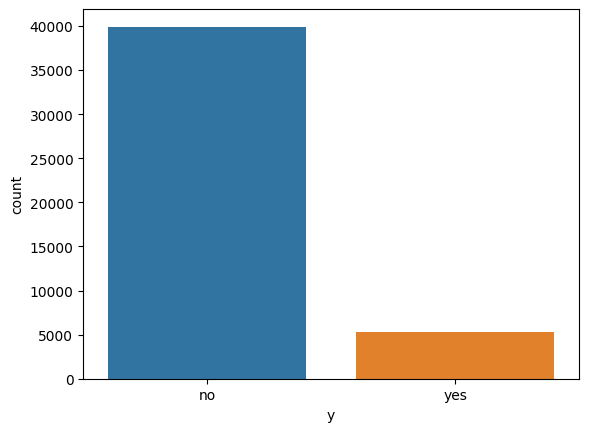

In [ ]:
sns.countplot(x=data['y'], data=data)
counts = data['y'].value_counts()
counts

Displaying the count of "yes" values

In [ ]:
counts = data['y'].value_counts()


We found that only 5289 (11.7%) people subscribed a term deposit in the complete data set

Categorizing the ages into different age groups

In [ ]:
data['age_range'] = pd.cut(x=data['age'], bins=[17,25,35,50,65,100], labels=['18-25', '26-35', '36-50','51-65', '65+'])

Displaying Countplot to explore the relationship between the 'age_range' and 'y' (subscription) variables in dataset.

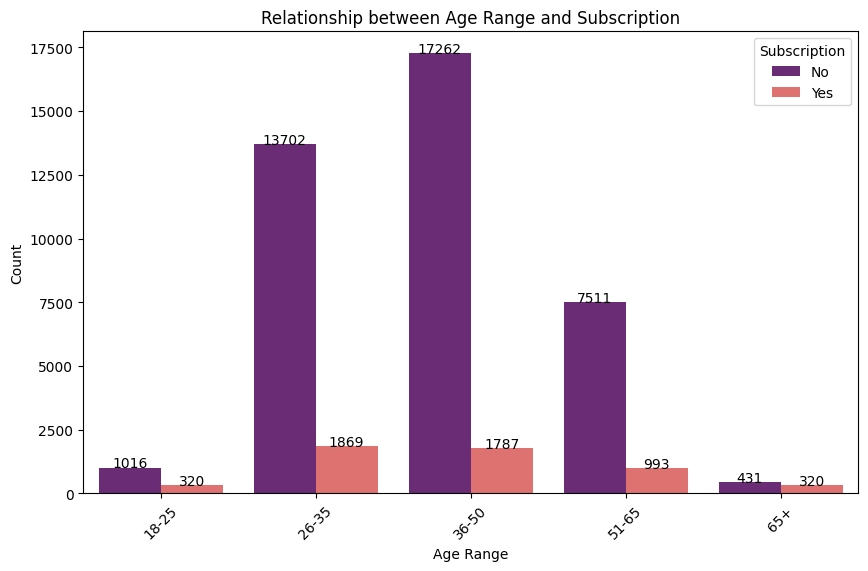

In [ ]:
# Exploring the relationship between 'age_range' and 'y' (subscription)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='age_range', hue='y', palette='magma')
plt.title('Relationship between Age Range and Subscription')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription', labels=['No', 'Yes'])

# Calculating and annotating the count values on the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')

plt.show()

Displaying Countplot to explore the relationship between the 'job' and 'y' (subscription) variables in dataset.


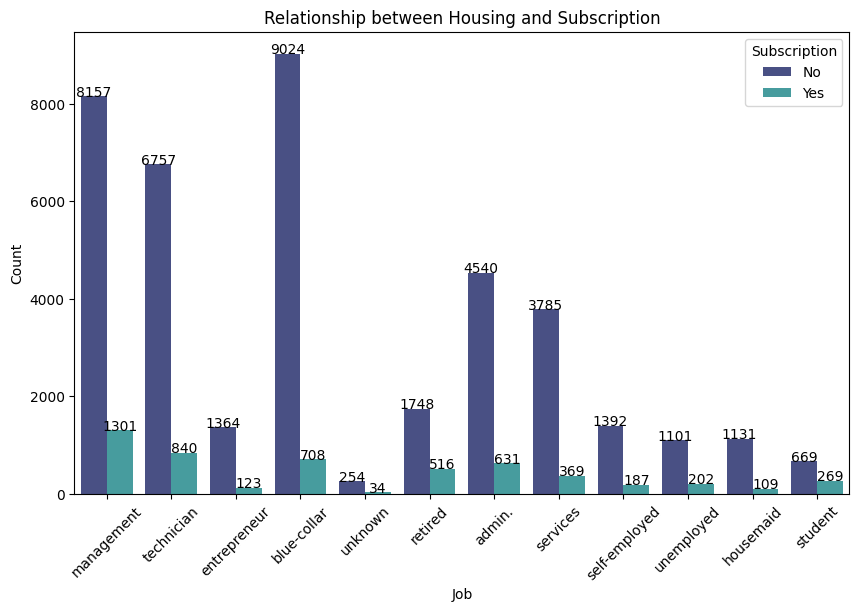

In [ ]:
# Exploring the relationship between 'Job' and 'y' (subscription)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='job', hue='y', palette='mako')
plt.title('Relationship between Housing and Subscription')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription', labels=['No', 'Yes'])

# Calculating and annotating the count values on the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')

plt.show()

Displaying Countplot to explore the relationship between the 'Marital Status' and 'y' (subscription) variables in dataset.


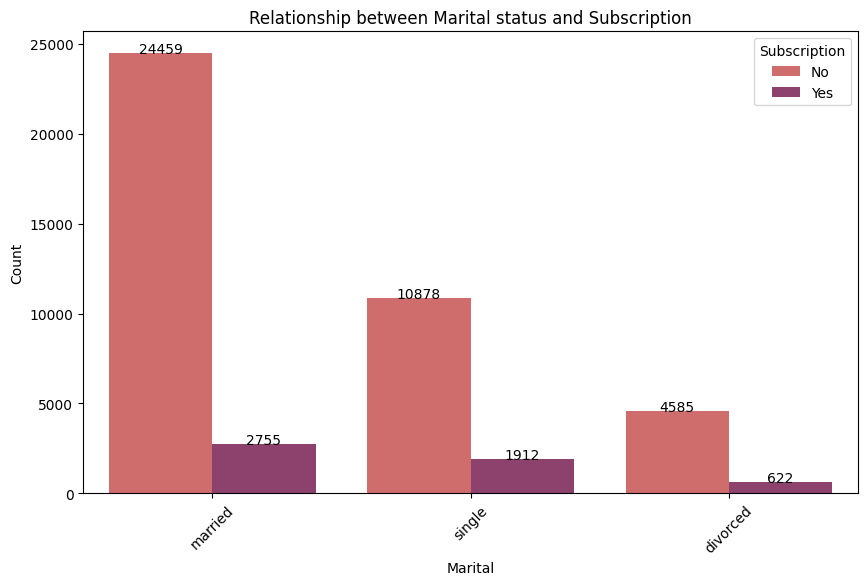

In [ ]:
# Exploring the relationship between 'Marital status' and 'y' (subscription)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='marital', hue='y', palette='flare')
plt.title('Relationship between Marital status and Subscription')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription', labels=['No', 'Yes'])

# Calculating and annotating the count values on the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')

plt.show()

Displaying Countplot to explore the relationship between the 'education' and 'y' (subscription) variables in dataset.


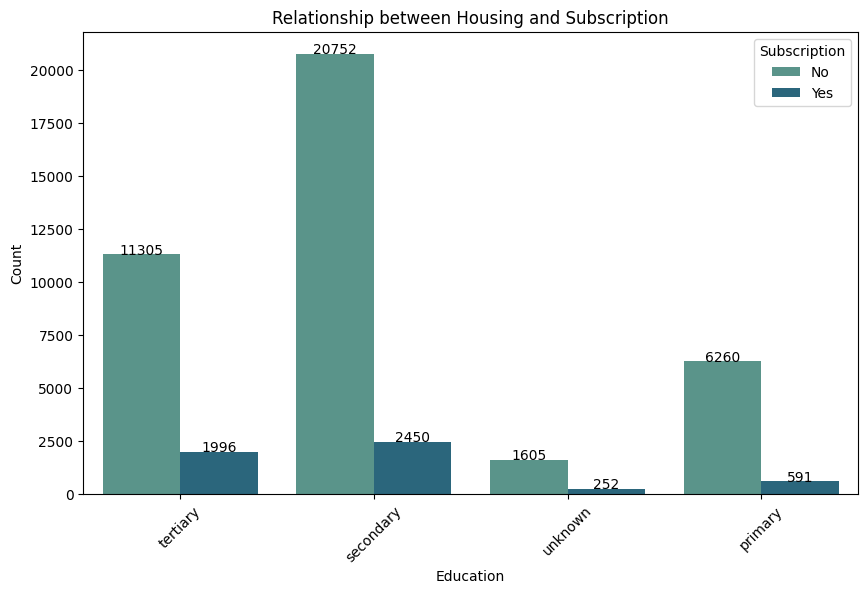

In [ ]:
# Exploring the relationship between 'Education' and 'y' (subscription)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='education', hue='y', palette='crest')
plt.title('Relationship between Housing and Subscription')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription', labels=['No', 'Yes'])

# Calculate and annotate the count values on the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')

plt.show()

Displaying Countplot to explore the relationship between the 'housing' and 'y' (subscription) variables in dataset.


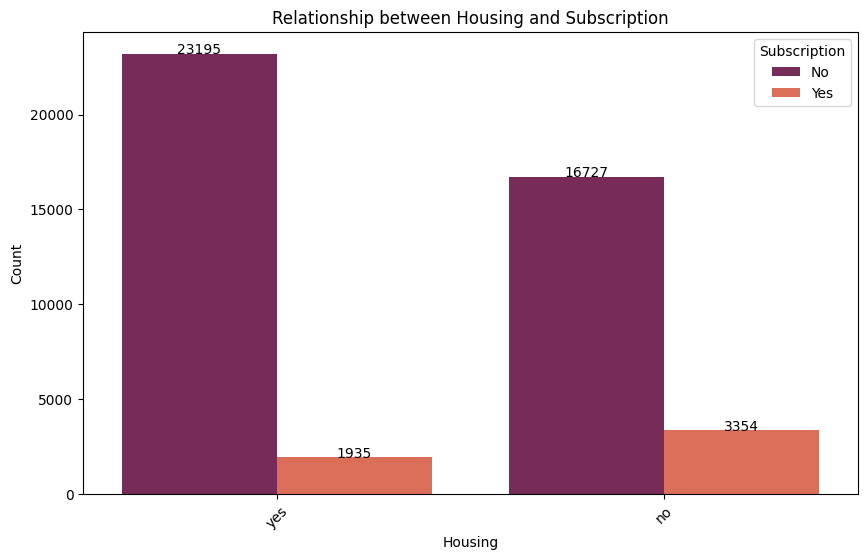

In [ ]:
# Exploring the relationship between 'Housing' and 'y' (subscription)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='housing', hue='y', palette='rocket')
plt.title('Relationship between Housing and Subscription')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription', labels=['No', 'Yes'])

# Calculating and annotating the count values on the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline')

plt.show()

Performing univariate analysis for each column in dataset by creating histograms for each column

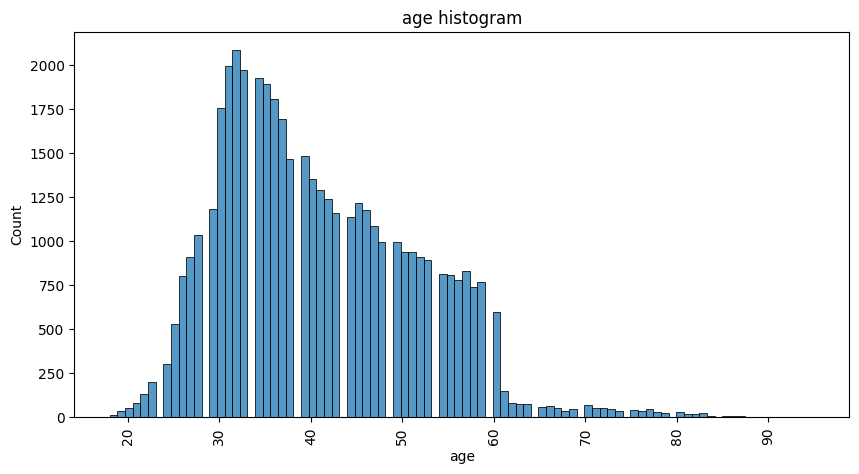

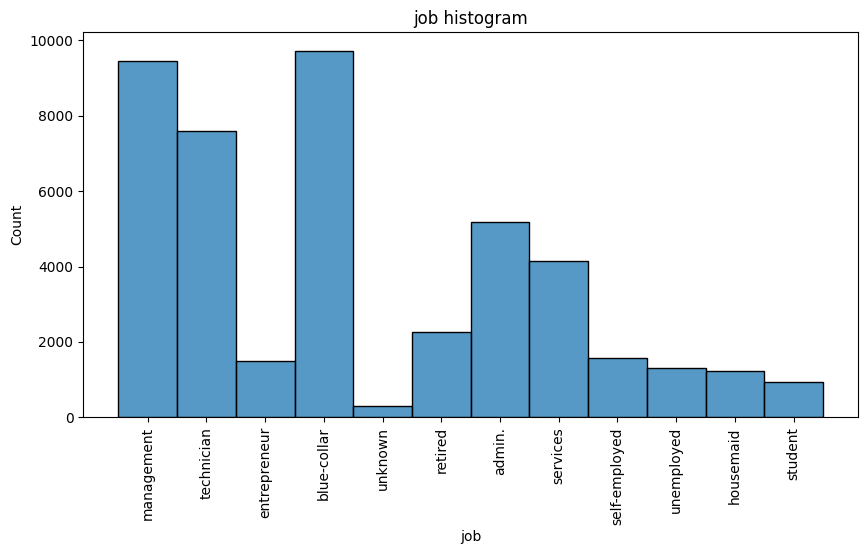

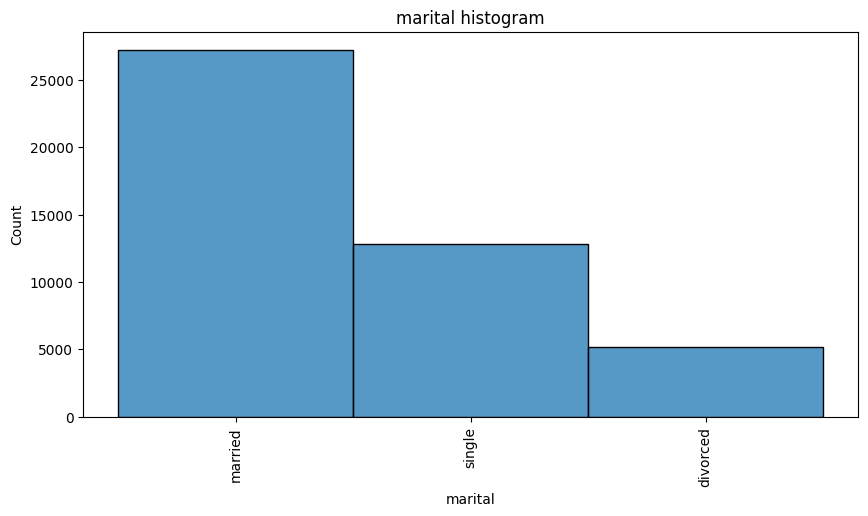

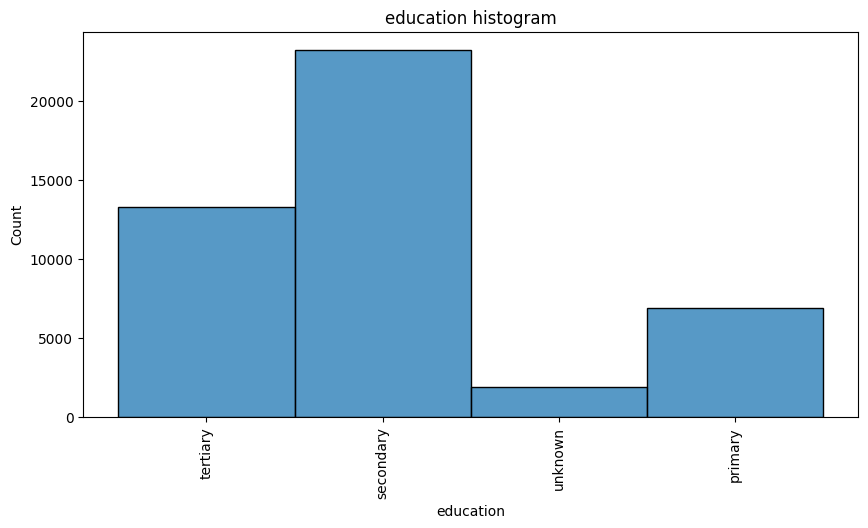

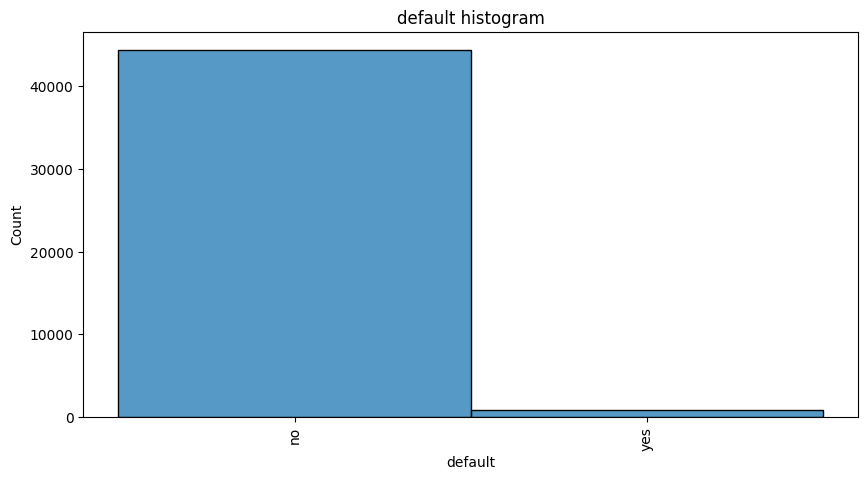

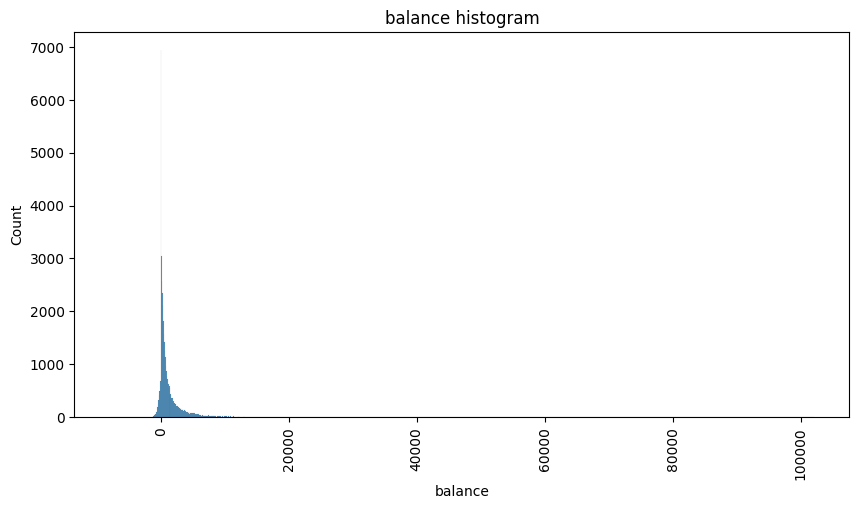

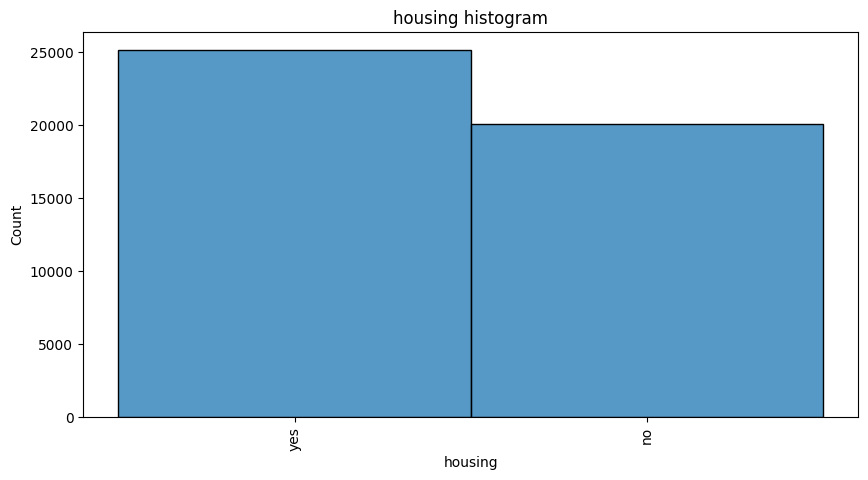

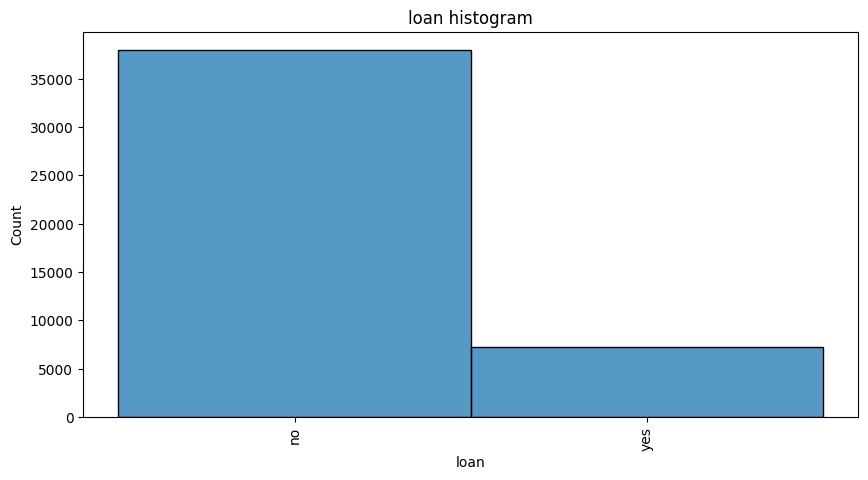

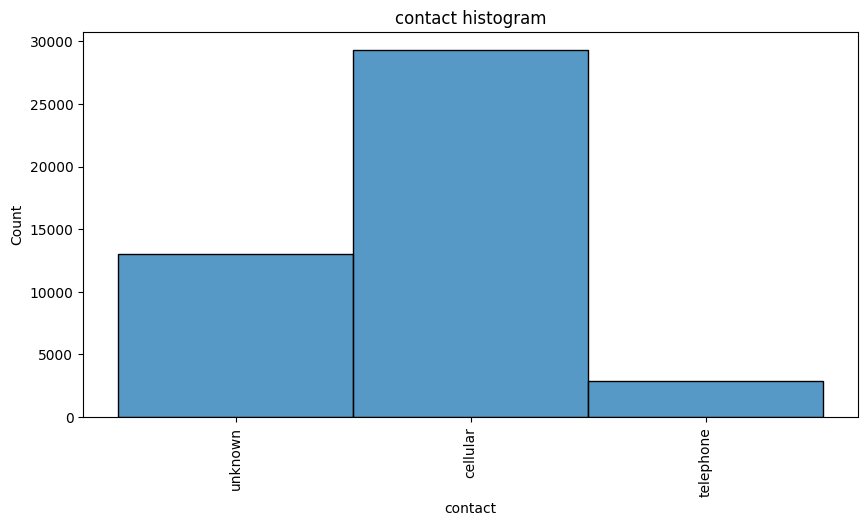

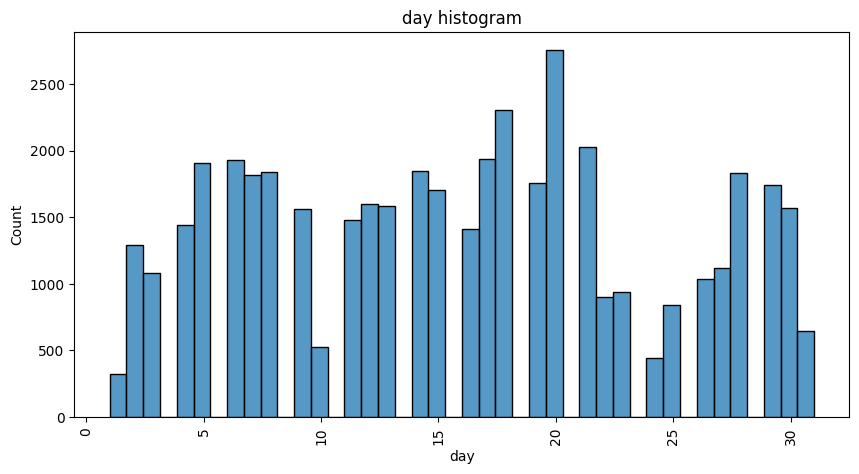

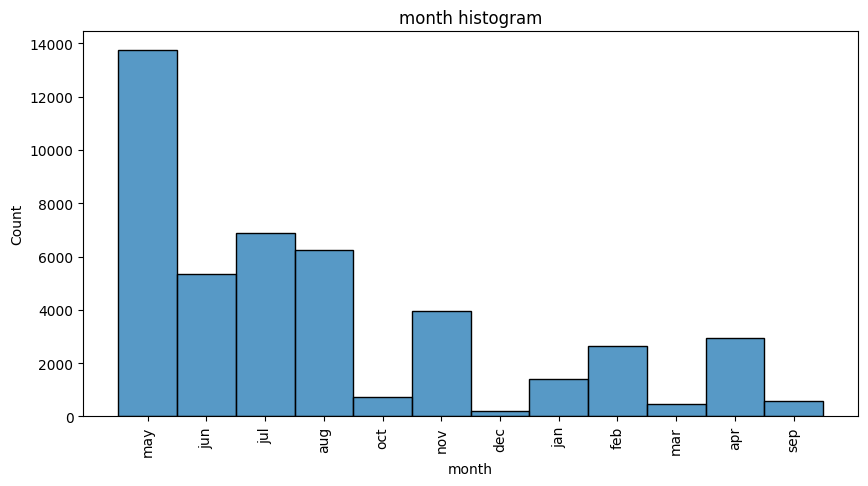

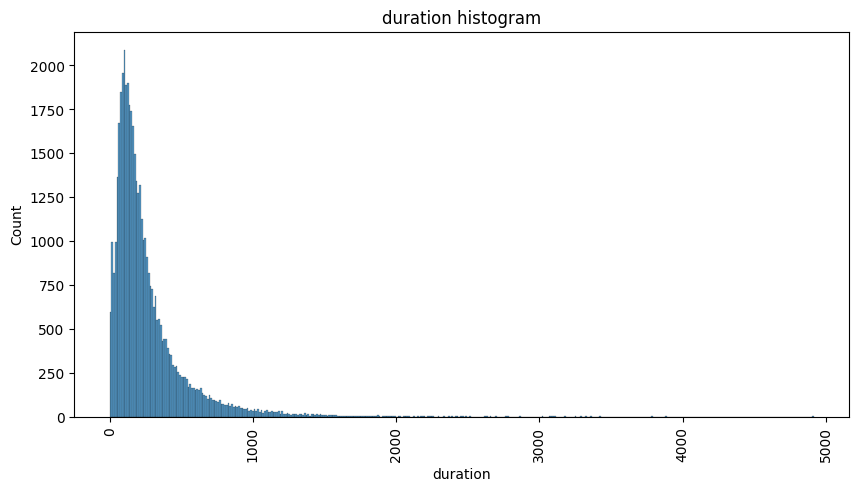

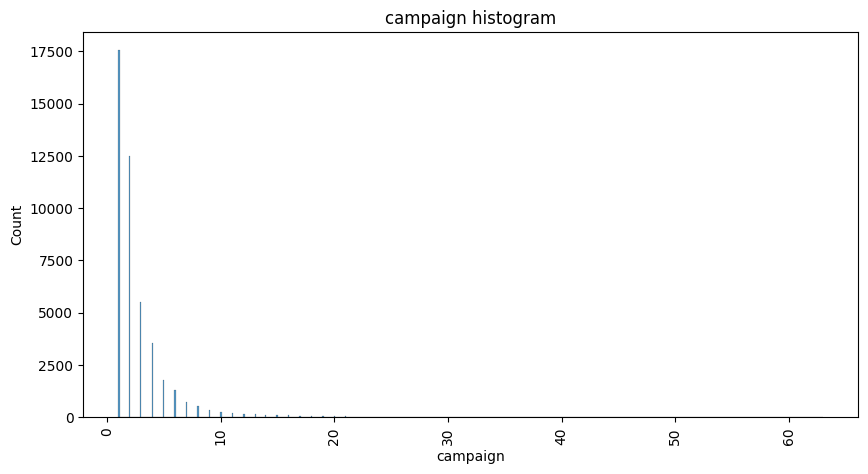

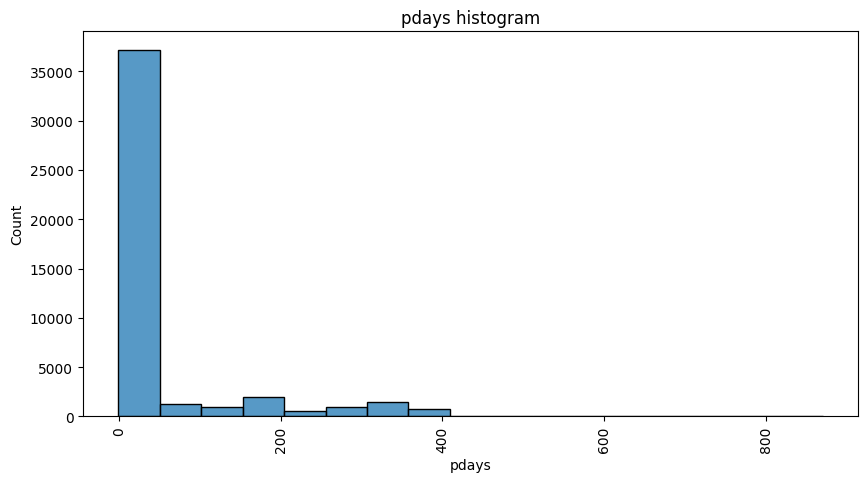

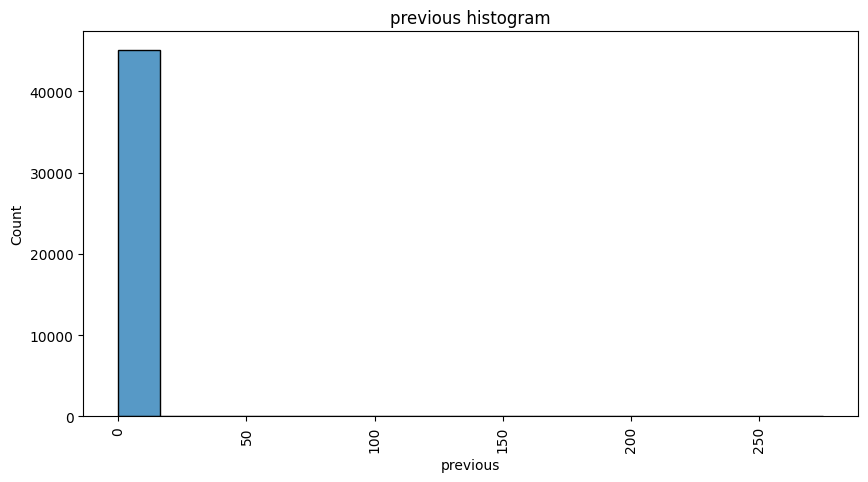

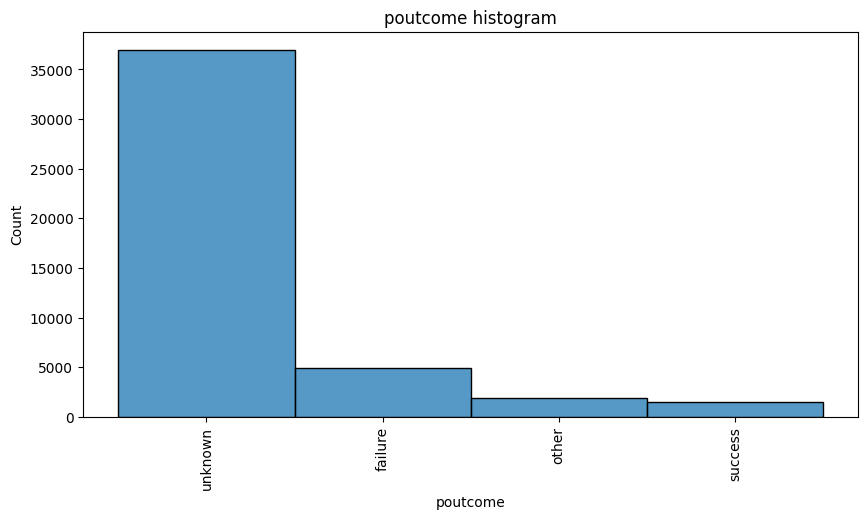

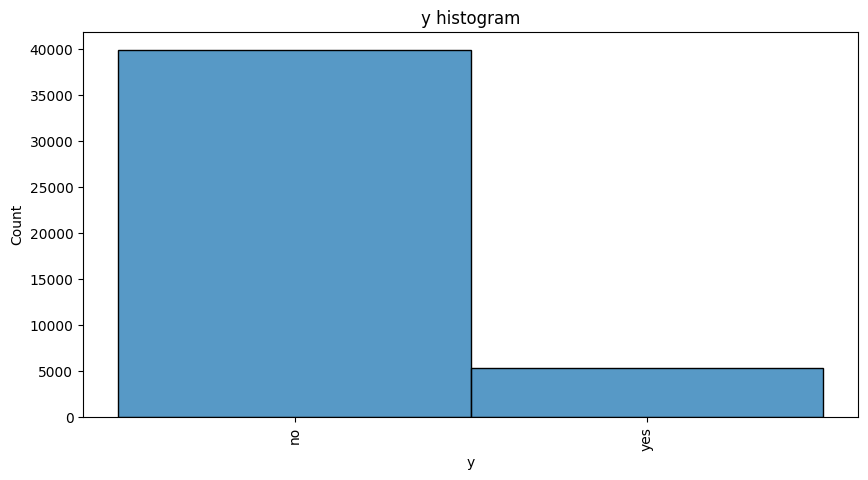

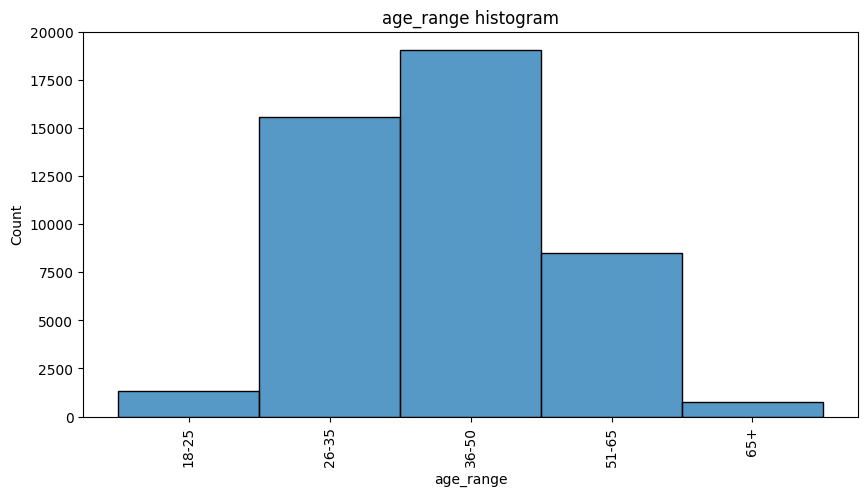

In [ ]:
#Check univariate analysis
for col in data.columns:
    fig, ax= plt.subplots(figsize=(10,5))
    ax.tick_params(axis='x', rotation=90)
    plt.title(f'{col} histogram')
    sns.histplot(data=data, x=col, ax=ax)
    plt.show()


# Findings:

The age group between 25 and 60 has the highest representation, surpassing other age groups in the dataset.

Individuals who are married outnumber those who are single or divorced.

The most frequently used contact method is the cellular phone.

Managerial positions, followed by blue-collar and technician roles, are more prevalent than other job categories.

A greater number of people do not have a credit in default compared to those who already have a credit in default.

A majority of people have not taken a personal loan.

The month of May exhibits the highest frequency of processes or interactions in the dataset.

# Checking correlation between continuous columns


In [ ]:
data[['age','balance','day','campaign','pdays','previous']].corr()

,age,balance,day,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,0.162490,-0.093044,-0.051710
campaign,0.004760,-0.014578,0.162490,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,-0.032855,0.454820,1.000000


Interpretation from the correlations

1. Age vs. Balance (0.097783): A very weak positive correlation is observed between a person's age and their account balance. This implies that, on average, older individuals tend to have slightly higher account balances.

2. Balance vs. Day (0.004503): There is a very weak positive correlation between account balance and the day of the last contact. This correlation suggests that there isn't a strong relationship between these two variables.

3. Day vs. Campaign (0.162490): A weak positive correlation is observed between the day of the last contact and the number of contacts made during the campaign. This suggests that more contacts are made on certain days.

4. Campaign vs. Pdays (-0.088628): A weak negative correlation exists between the number of contacts made during the campaign and the number of days since the client was last contacted. This implies that as the number of days since the last contact increases, the number of campaign contacts tends to decrease.

5. Pdays vs. Previous (0.454820): A moderate positive correlation is observed between the number of days since the client was last contacted and the number of previous contacts. This indicates that clients who were contacted more frequently in the past tend to have longer gaps between contacts.

6.Previous vs. Balance (0.016674): There is a very weak positive correlation between the number of previous contacts and the account balance. This suggests that clients with higher account balances tend to have slightly more previous contacts.







In [ ]:
# Checking rows duplicates
data.duplicated().sum()


0

In [ ]:
# Checking the unique values of each column
for col in data:
    print(col + ':')
    print(data[col].unique())

age:
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital:
['married' 'single' 'divorced']
education:
['tertiary' 'secondary' 'unknown' 'primary']
default:
['no' 'yes']
balance:
[ 2143    29     2 ...  8205 14204 16353]
housing:
['yes' 'no']
loan:
['no' 'yes']
contact:
['unknown' 'cellular' 'telephone']
day:
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration:
[ 261  151   76 ... 1298 1246 1556]
campaign:
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 3

 Filling missing values in columns with the median of that column

In [ ]:
for column in data.columns:
    if data[column].dtype == 'float64' or data[column].dtype == 'int64':
        data[column].fillna(data[column].median(), inplace=True)

In [ ]:
# Checking null values
missing_data=data.isnull().sum()
missing_data

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
age_range    0
dtype: int64

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,51-65
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,36-50
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,26-35
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,36-50
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,51-65
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,65+
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,65+
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,51-65


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,51-65
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,36-50
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,26-35
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,36-50
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,26-35


# Feature Engineering

In [ ]:
# Encode 'month' column with values 1-12
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
data['month'] = data['month'].map(month_mapping)

# Encode 'y' column with 'yes' as 1 and 'no' as 0
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Encode the remaining categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
# Encode the 'age_range' column
data['age_range_encoded'] = label_encoder.fit_transform(data['age_range'])

# Drop the original 'age_range' column
data = data.drop(columns=['age_range'])

# Now, 'age_range_encoded' contains the numerical encoding of the 'age_range' values
# Split the data into train and test
X = data.drop(columns=['y'])  # Feature variables
y = data['y']  # Target variable

# X_train, X_test, y_train, and y_test contain the training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range_encoded
45206,51,9,1,2,0,825,0,0,0,17,11,977,3,-1,0,3,1,3
45207,71,5,0,0,0,1729,0,0,0,17,11,456,2,-1,0,3,1,4
45208,72,5,1,1,0,5715,0,0,0,17,11,1127,5,184,3,2,1,4
45209,57,1,1,1,0,668,0,0,1,17,11,508,4,-1,0,3,0,3
45210,37,2,1,1,0,2971,0,0,0,17,11,361,2,188,11,1,0,2


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range_encoded
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0,3
1,44,9,2,1,0,29,1,0,2,5,5,151,1,-1,0,3,0,2
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3,0,1
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3,0,2
4,33,11,2,3,0,1,0,0,2,5,5,198,1,-1,0,3,0,1


# 3. Model Development:

In [ ]:
# Spliting the data into features (X) and target (y)
X_train = data.drop(columns=['y'])
y_train = data['y']
X_test = data.drop(columns=['y'])
y_test = data['y']


In [ ]:
print(data['y'].value_counts())


0    39922
1     5289
Name: y, dtype: int64


Logistic Regression Metrics:
Accuracy: 0.89
Precision: 0.58
Recall: 0.21
F1-score: 0.30
ROC AUC: 0.86


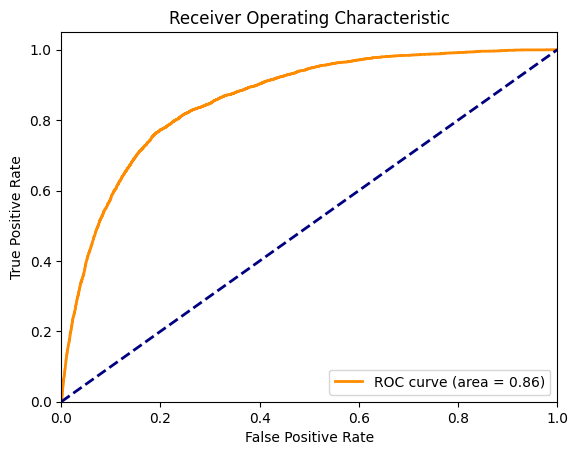

Random Forest Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
ROC AUC: 1.00


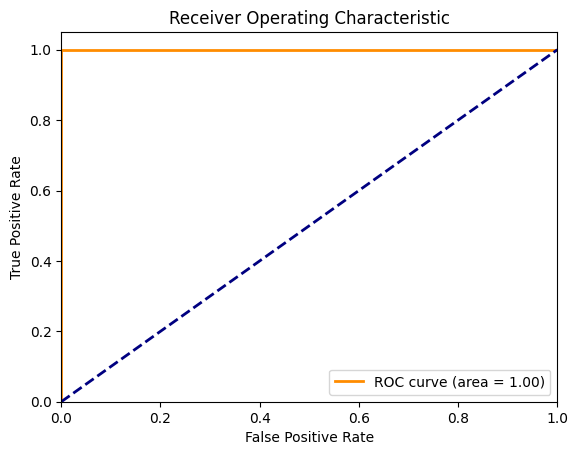

Gradient Boosting Metrics:
Accuracy: 0.91
Precision: 0.68
Recall: 0.40
F1-score: 0.51
ROC AUC: 0.93


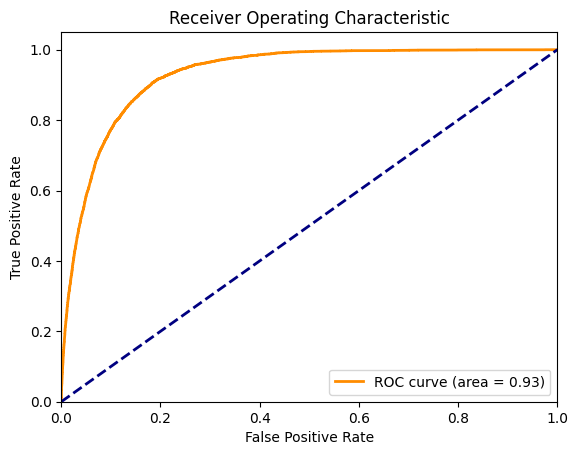

Neural Network Metrics:
Accuracy: 0.89
Precision: 0.53
Recall: 0.29
F1-score: 0.37
ROC AUC: 0.74


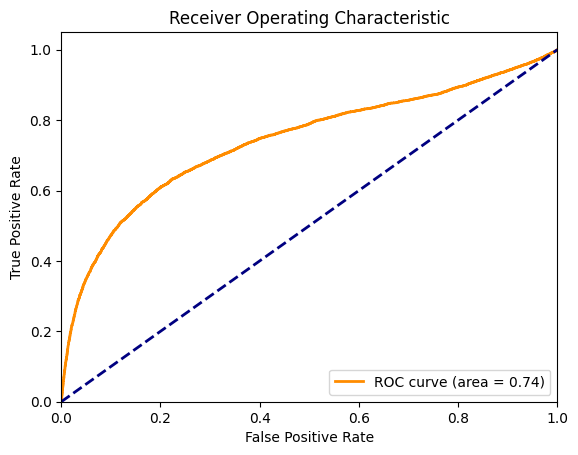

SVM Metrics:
Accuracy: 0.88
Precision: 0.56
Recall: 0.01
F1-score: 0.02
The best model is RandomForestClassifier()


In [ ]:
# Convert target variable to binary labels

# Initialize and train different models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=10000)),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Neural Network", MLPClassifier(max_iter=1000)),
    ("SVM", SVC(probability=True))
]

best_model = None
best_accuracy = 0

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

    if name != "SVM":
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        print(f"ROC AUC: {roc_auc:.2f}")

        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

    if accuracy > best_accuracy and accuracy<1:
        best_accuracy = accuracy
        best_model = model

print(f"The best model is {best_model}")


# Step 4: Feature Importance Analysis
# Rank the importance of features using the best model

Feature Importance Analysis:
              Feature  Importance
11           duration    0.286367
5             balance    0.104941
9                 day    0.093680
0                 age    0.092886
10              month    0.080065
15           poutcome    0.054547
13              pdays    0.047763
1                 job    0.047731
12           campaign    0.037633
6             housing    0.028296
3           education    0.026959
16  age_range_encoded    0.024729
14           previous    0.021620
2             marital    0.020954
8             contact    0.020191
7                loan    0.009906
4             default    0.001731


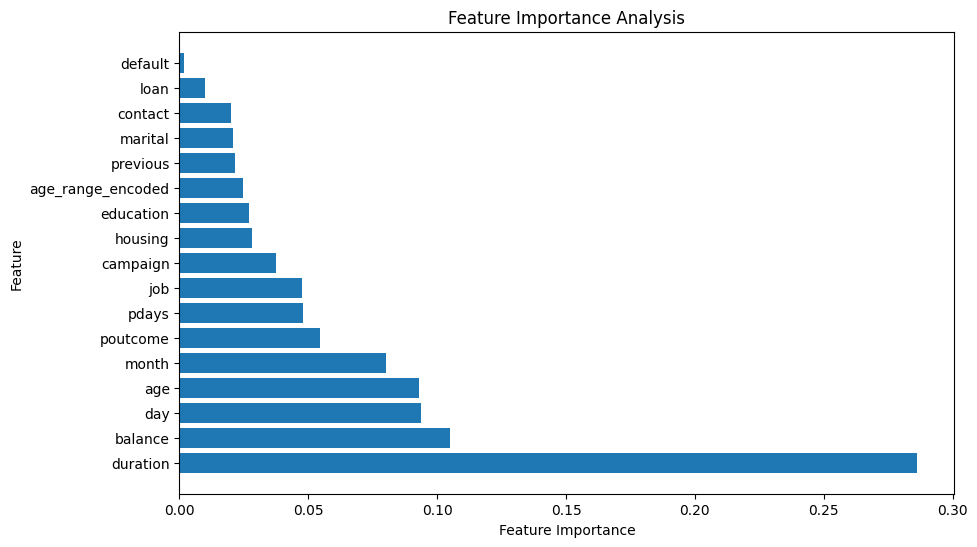

In [ ]:
# Fit the best model (RandomForestClassifier) to the training data
best_model.fit(X_train, y_train)

# Get feature importances from the model
feature_importances = best_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance Analysis:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()

# Propensity Score Model Development

In [ ]:
# Step 1: Propensity Score Model Development
propensity_model = LogisticRegression(max_iter=10000)
propensity_model.fit(X_train, y_train)

# Step 2: Predict Propensity Scores
train_propensity_scores = propensity_model.predict_proba(X_train)[:, 1]
test_propensity_scores = propensity_model.predict_proba(X_test)[:, 1]

# Step 3: Identify High-Value Leads
threshold = 0.5
train_high_value_leads = (train_propensity_scores >= threshold)
test_high_value_leads = (test_propensity_scores >= threshold)

# Print the counts of high-value leads in the training and testing sets
print("High-Value Leads in Training Data:", train_high_value_leads.sum())
print("High-Value Leads in Testing Data:", test_high_value_leads.sum())

High-Value Leads in Training Data: 1882
High-Value Leads in Testing Data: 1882


 **Marketing Campaign Optimization**

 Script for optimizing a marketing strategy based on various factors like the month and day of the week, previous contact history, and economic conditions. It prints out recommendations for when and how to adjust the marketing approach.

In [ ]:
# Strategy based on month and day of the week
month_optimized = data.groupby('month').size().idxmax()
day_optimized = data.groupby('day').size().idxmax()

# Strategy based on previous contact
recent_contact = data[data['pdays'] < 15]  # contacts made in the last 15 days

# Strategy based on economic conditions
good_economic_condition = data[data['housing'] > data['housing'].median()]
bad_economic_condition = data[data['housing'] <= data['housing'].median()]

print(f"Best month to contact: {month_optimized}")
print(f"Best day of the week to contact: {day_optimized}")

# Adjusting messaging based on economic conditions
if len(good_economic_condition) > len(bad_economic_condition):
    print("Focus on messaging highlighting the positive economic condition.")
else:
    print("Focus on messaging catering to a cautious economic condition.")

# Adjusting frequency based on previous contacts
if len(recent_contact) > len(data) * 0.5:
    print("You're contacting many leads recently. Ensure not to over-contact.")
else:
    print("Keep the communication frequent, but don't overwhelm the leads.")

Best month to contact: 5
Best day of the week to contact: 20
Focus on messaging catering to a cautious economic condition.
You're contacting many leads recently. Ensure not to over-contact.


In [ ]:
unique_elements = data['day'].unique()

print(unique_elements)

[ 4  7  8  9 10 11 14 15 16 17 18 21 22 23 24 25 28 29 30 31  5  6 12 13
 19 20 26 27  2  3  1]


 Performing feature selection and then segmenting the data based on the "age" feature

In [ ]:
# Selecting top features
important_features = [
    'duration',  'pdays',  'month',
    'poutcome', 'age'
]

X = data[important_features]
y = data['y']

# Segmenting data based on age
segments = {
    "young": data[data['age'] <= 30].reset_index(drop=True),
    "middle_aged": data[(data['age'] > 30) & (data['age'] <= 50)].reset_index(drop=True),
    "senior": data[data['age'] > 50].reset_index(drop=True)
}
segment_models = {}

for segment, segment_data in segments.items():
    X_segment = segment_data[important_features]
    y_segment = segment_data['y']

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X_segment, y_segment, test_size=0.3, random_state=42)

    # Train a model for this segment
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)

    # Store the model
    segment_models[segment] = model

    # Print the accuracy for this segment
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy for {segment} segment: {accuracy:.2f}")

Accuracy for young segment: 0.84
Accuracy for middle_aged segment: 0.90
Accuracy for senior segment: 0.85


 Adding more features to the list of important features and then creating segments in the data based on the 'duration' feature.

In [ ]:
important_features = [
    'duration',  'pdays',  'month',
    'poutcome',  'age', 'housing','day','campaign'
]

X = data[important_features]
y = data['y']

segments = {
    "short": data[data['duration'] <= 100],
    "medium": data[(data['duration'] > 100) & (data['duration'] <= 300)],
    "long": data[data['duration'] > 300]
}

segment_models = {}

for segment, segment_data in segments.items():
    X_segment = segment_data[important_features]
    y_segment = segment_data['y']

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X_segment, y_segment, test_size=0.3, random_state=42)

    # Train a model for this segment
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)

    # Store the model
    segment_models[segment] = model

    # Print the accuracy for this segment
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy for {segment} segment: {accuracy:.2f}")

Accuracy for short segment: 0.98
Accuracy for medium segment: 0.90
Accuracy for long segment: 0.77
